### Dataset Selection and Preprocessing

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('diabetes_prediction_dataset.csv')
data = pd.DataFrame(data)
unnormalized_data = pd.DataFrame(data)

data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [38]:
# Let us understand the structure of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [39]:
# Checking for missing values

data.isnull().sum()
print('The dataset has no missing values.')

The dataset has no missing values.


In [41]:
# Removing unspecified data

# Display count of 'Other' values in the 'gender' column
other_count = data[data['gender'] == 'Other'].shape[0]
print("Count of 'Other' values in the 'gender' column:", other_count)

data = data[data['gender'] != 'Other']


index_to_drop = data[data['gender'] == 'Other'].index
data = data.drop(index=index_to_drop)
other_count_after_drop = data[data['gender'] == 'Other'].shape[0]
print("Count of 'Other' values in the 'gender' column after dropping:", other_count_after_drop)


Count of 'Other' values in the 'gender' column: 0
Count of 'Other' values in the 'gender' column after dropping: 0


In [42]:
# Display count of 'not current' and 'former' values in the 'smoking_history' column before replacement
not_current_count_before = data[data['smoking_history'] == 'not current'].shape[0]
print("1. Count of 'not current' values in the 'smoking_history' column before replacement:", not_current_count_before)
former_before = data[data['smoking_history'] == 'former'].shape[0]
print("2. Count of 'former' values in the 'smoking_history' column before replacement:", former_before)

# Replace 'not current' with 'former' in the 'smoking_history' column
data['smoking_history'] = data['smoking_history'].replace('not current', 'former')

# Display count of 'not_current' values in the 'smoking_history' column after replacement
not_current_after = data[data['smoking_history'] == 'not_current'].shape[0]
print("3. Count of 'not_current' values in the 'smoking_history' column after replacement:", not_current_after)

# Display count of 'former' values in the 'smoking_history' column after replacement
former_count_after = data[data['smoking_history'] == 'former'].shape[0]
print("4. Count of 'former' values in the 'smoking_history' column after replacement:", former_count_after)


1. Count of 'not current' values in the 'smoking_history' column before replacement: 6439
2. Count of 'former' values in the 'smoking_history' column before replacement: 9352
3. Count of 'not_current' values in the 'smoking_history' column after replacement: 0
4. Count of 'former' values in the 'smoking_history' column after replacement: 15791


In [43]:
print('It is common to have duplicate records in medical data due to multiple entries or identical measurements for patients.')
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

It is common to have duplicate records in medical data due to multiple entries or identical measurements for patients.
Number of duplicate rows:  (3952, 9)


In [44]:
# Dropping duplicate records
data = data.drop_duplicates()


In [45]:
data
print('Now the dataset is clean and ready to use for analyis.')

Now the dataset is clean and ready to use for analyis.


In [46]:
data.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96030.000000,96030.000000,96030.000000,96030.000000,96030.000000,96030.000000,96030.000000
mean,41.779738,0.077663,0.040841,27.321452,5.532951,138.223586,0.088327
std,22.459205,0.267642,0.197924,6.771263,1.073238,40.917123,0.283771
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [47]:
print('1. The average age of individuals in the dataset is approximately 41.79 years, with a standard deviation of approximately 22.46 years.')
print('2. The dataset indicates a low prevalence of hypertension and heart disease, with only 7.76% of individuals having hypertension and 4.08% having heart disease.')
print('3. The average HbA1c level in the dataset is approximately 5.53%, with a standard deviation of approximately 1.07%. HbA1c levels are important indicators of long-term blood sugar control in individuals with diabetes. Understanding the distribution of HbA1c levels can provide insights into the overall management of diabetes in the dataset.')

1. The average age of individuals in the dataset is approximately 41.79 years, with a standard deviation of approximately 22.46 years.
2. The dataset indicates a low prevalence of hypertension and heart disease, with only 7.76% of individuals having hypertension and 4.08% having heart disease.
3. The average HbA1c level in the dataset is approximately 5.53%, with a standard deviation of approximately 1.07%. HbA1c levels are important indicators of long-term blood sugar control in individuals with diabetes. Understanding the distribution of HbA1c levels can provide insights into the overall management of diabetes in the dataset.


In [48]:
from warnings import filterwarnings
filterwarnings('ignore')

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing columns
columns_to_normalize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.000000,0,1,never,0.177171,0.563636,0.272727,0
1,Female,0.674675,0,0,No Info,0.202031,0.563636,0.000000,0
2,Male,0.349349,0,0,never,0.202031,0.400000,0.354545,0
3,Female,0.449449,0,0,current,0.156863,0.272727,0.340909,0
4,Male,0.949950,1,1,current,0.118231,0.236364,0.340909,0
...,...,...,...,...,...,...,...,...,...
99994,Female,0.449449,0,0,No Info,0.170285,0.236364,0.295455,0
99996,Female,0.024024,0,0,No Info,0.085901,0.545455,0.090909,0
99997,Male,0.824825,0,0,former,0.207983,0.400000,0.340909,0
99998,Female,0.299299,0,0,never,0.296569,0.090909,0.090909,0


In [50]:
# The data is ready to be split into training and test sets

from sklearn.model_selection import train_test_split

# Since 'Diabetes' is the target variable it is dropped. The rest are features.
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (76824, 8) (76824,)
Testing set shape: (19206, 8) (19206,)


### Exploratory Data Analysis (EDA) and Feature Selection

In [51]:
print('We have already conducted summary statistics and acquired essential details.')

We have already conducted summary statistics and acquired essential details.


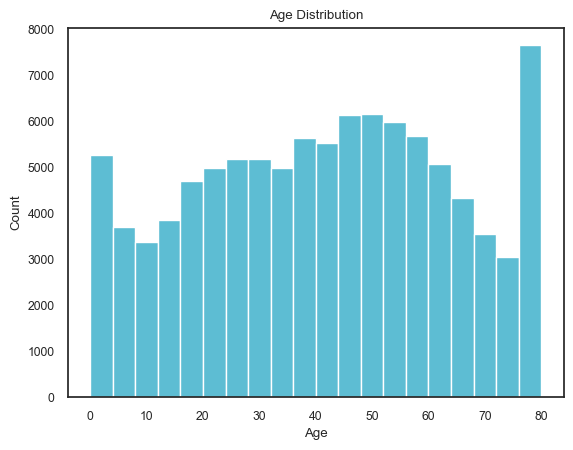

1. Understanding the age distribution aids in identifying potential age-related patterns or biases in the dataset, crucial for targeted analysis or modeling decisions.
2. We can infer from the plot that ages near 80 contribute to a larger count compared to other age groups.


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(unnormalized_data['age'], bins=20, edgecolor='white', color='#5DBDD3')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

print('1. Understanding the age distribution aids in identifying potential age-related patterns or biases in the dataset, crucial for targeted analysis or modeling decisions.')
print('2. We can infer from the plot that ages near 80 contribute to a larger count compared to other age groups.')



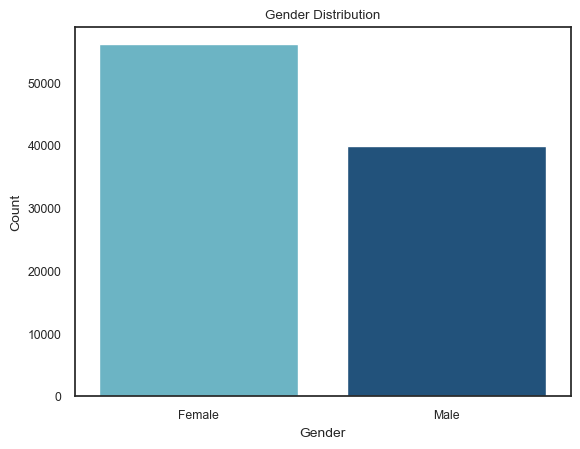

1. This visualization is important as it allows us to determine the ratio of genders in the dataset, facilitating insights and potential correlations based on gender-specific patterns or behaviors.
2. Females exceed Males in count for Diabetes. This could be a trend that has to be observed.


In [53]:
# Bar plot: Count vs Gender

sns.countplot(x='gender', data=data[data['gender'].isin(['Male', 'Female'])], palette=['#5DBDD3', '#13538A'])
plt.title('Gender Distribution')
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()
print('1. This visualization is important as it allows us to determine the ratio of genders in the dataset, facilitating insights and potential correlations based on gender-specific patterns or behaviors.')
print('2. Females exceed Males in count for Diabetes. This could be a trend that has to be observed.')


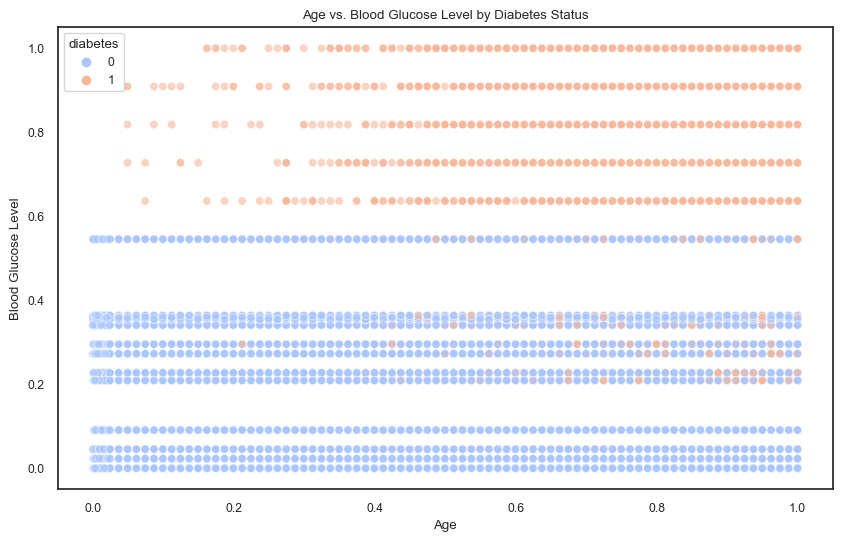

1. The scatterplot illustrates the relationship between age and blood glucose levels, differentiated by diabetes status.
2. Generally, higher blood glucose levels are observed across various age groups for individuals with diabetes compared to those without.
3. This visualization highlights the importance of blood glucose levels as a key indicator of diabetes.
4. For older age groups (approximately 60 years and above), the number of diabetic individuals with higher blood glucose levels is more prevalent.
5. In the younger age group (below approximately 40 years), there are fewer instances of high blood glucose levels in both diabetic and non-diabetic individuals.


In [54]:
# Scatterplot for Age vs. Blood Glucose Level by Diabetes Status

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='blood_glucose_level', hue='diabetes', data=data, palette='coolwarm', alpha=0.6)
plt.title('Age vs. Blood Glucose Level by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.show()

print('1. The scatterplot illustrates the relationship between age and blood glucose levels, differentiated by diabetes status.')
print('2. Generally, higher blood glucose levels are observed across various age groups for individuals with diabetes compared to those without.')
print('3. This visualization highlights the importance of blood glucose levels as a key indicator of diabetes.')
print('4. For older age groups (approximately 60 years and above), the number of diabetic individuals with higher blood glucose levels is more prevalent.')
print('5. In the younger age group (below approximately 40 years), there are fewer instances of high blood glucose levels in both diabetic and non-diabetic individuals.')


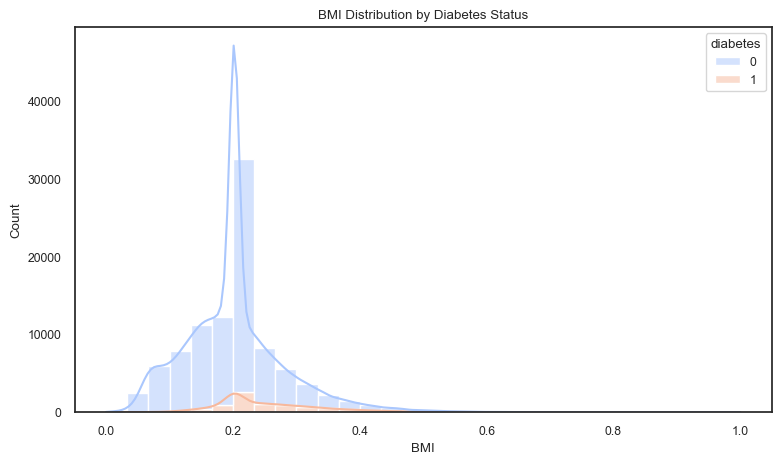

1. The most common BMI range for both groups is between roughly 20 and 30, with a peak around 25-27.
2. There is a noticeable presence of individuals with higher BMI levels within the diabetic group.
3. This graph is crucial for identifying the relationship between BMI and diabetes; a higher BMI is commonly associated with an increased risk of diabetes.


In [55]:
# Histogram for BMI Distribution by Diabetes Status

plt.figure(figsize=(9, 5))
sns.histplot(data=data, x='bmi', hue='diabetes', multiple='stack', palette='coolwarm', bins=30, kde=True)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

print('1. The most common BMI range for both groups is between roughly 20 and 30, with a peak around 25-27.')
print('2. There is a noticeable presence of individuals with higher BMI levels within the diabetic group.')
print('3. This graph is crucial for identifying the relationship between BMI and diabetes; a higher BMI is commonly associated with an increased risk of diabetes.')

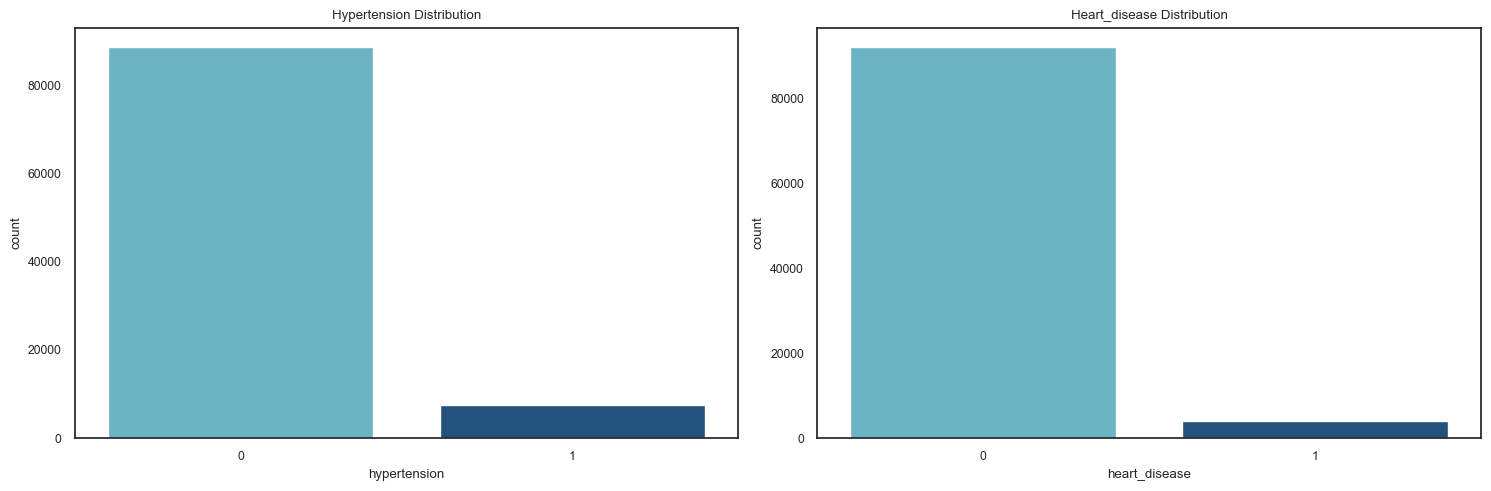

In [56]:
colors = ['#5DBDD3', '#13538A']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot count plots for Hypertension and Heart disease
for i, col in enumerate(['hypertension', 'heart_disease']):
    sns.countplot(x=col, data=data, palette=colors, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} Distribution')

plt.tight_layout()
plt.show()


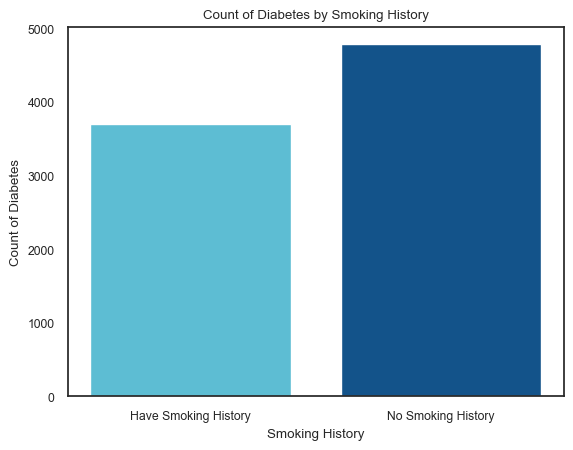

In [57]:
# Finding out how many people with diabetes are associated with smoking vs. people with no smoking history

data_encoded = data.copy()  
data_encoded['gender'] = data_encoded['gender'].map({'Male': 1, 'Female': 0})
data_encoded['smoking_history'] = data_encoded['smoking_history'].map({'current': 1, 'ever': 1, 'former': 1, 'never': 0, 'No Info': 0})

# Count occurrences of diabetes for smoking history value 1
count_diabetes_with_1_smoking_history = data_encoded[data_encoded['smoking_history'] == 1]['diabetes'].sum()

# Count occurrences of diabetes for smoking history value 0
count_diabetes_with_0_smoking_history = data_encoded[data_encoded['smoking_history'] == 0]['diabetes'].sum()

# Create a bar plot
plt.bar(['Have Smoking History', 'No Smoking History'], [count_diabetes_with_1_smoking_history, count_diabetes_with_0_smoking_history], color=['#5DBDD3', '#13538A'])
plt.xlabel('Smoking History')
plt.ylabel('Count of Diabetes')
plt.title('Count of Diabetes by Smoking History')
plt.show()


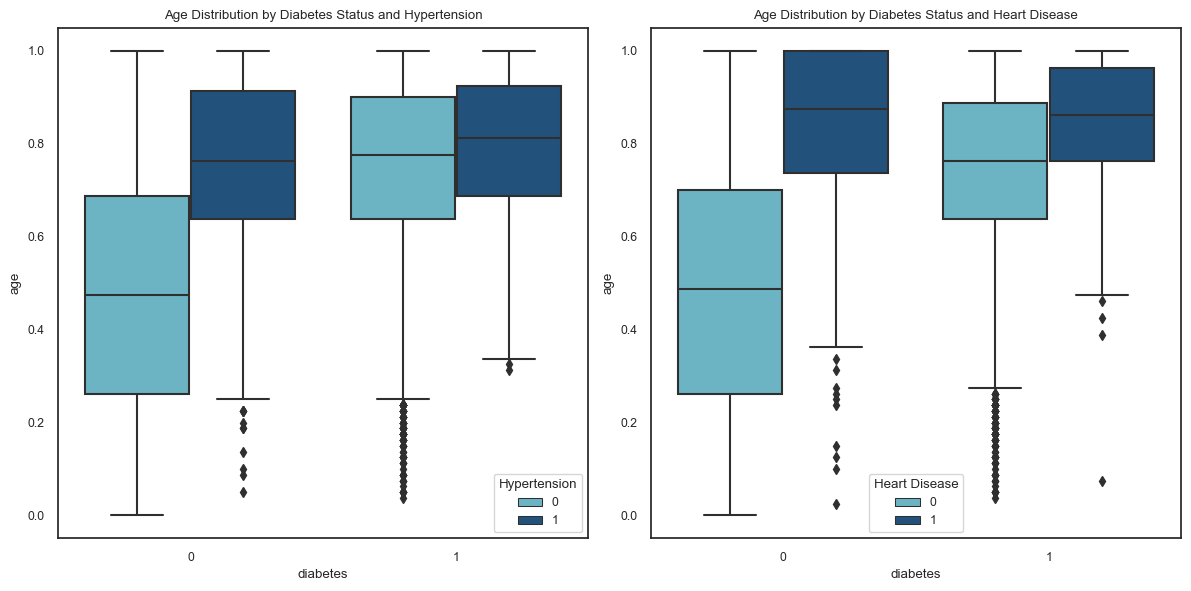

1. Individuals with diabetes, whether they have hypertension or not, tend to have a higher median age compared to non-diabetics.
2. There is a noticeable presence of outliers in younger ages for non-diabetics with hypertension.
3. Those with heart disease tend to be older, and this is more pronounced in the diabetic group.
4. There are several outliers in the younger age range for non-diabetics with heart disease. This means that when heart disease is present, it does not necessarily correlate with diabetes, and vice versa, suggesting independent risk factors at play.
5. The outliers, particularly younger individuals with heart disease, warrant further investigation to determine if they represent true cases with unique risk profiles or if they are due to data anomalies.


In [58]:
# Visualizing using boxplots

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Interaction between Age, Hypertension, and Diabetes
sns.boxplot(x='diabetes', y='age', hue='hypertension', data=data, ax=axes[0], palette=['#5DBDD3', '#13538A'])
axes[0].set_title('Age Distribution by Diabetes Status and Hypertension')
axes[0].legend(title='Hypertension')

# Interaction between Age, Heart Disease, and Diabetes
sns.boxplot(x='diabetes', y='age', hue='heart_disease', data=data, ax=axes[1], palette=['#5DBDD3', '#13538A'])
axes[1].set_title('Age Distribution by Diabetes Status and Heart Disease')
axes[1].legend(title='Heart Disease')

plt.tight_layout()
plt.show()

print('1. Individuals with diabetes, whether they have hypertension or not, tend to have a higher median age compared to non-diabetics.')
print('2. There is a noticeable presence of outliers in younger ages for non-diabetics with hypertension.')
print('3. Those with heart disease tend to be older, and this is more pronounced in the diabetic group.')
print('4. There are several outliers in the younger age range for non-diabetics with heart disease. This means that when heart disease is present, it does not necessarily correlate with diabetes, and vice versa, suggesting independent risk factors at play.')
print('5. The outliers, particularly younger individuals with heart disease, warrant further investigation to determine if they represent true cases with unique risk profiles or if they are due to data anomalies.')


The category "Ever" represents individuals who have ever smoked in their lifetime, regardless of their current smoking status. It includes individuals who are currently smoking ("Current"), as well as those who have previously smoked but may have quit at the time of data collection ("Former").
Values of current, ever and former are people who have been or are currently associated with the habit of smoking and are marked 1.


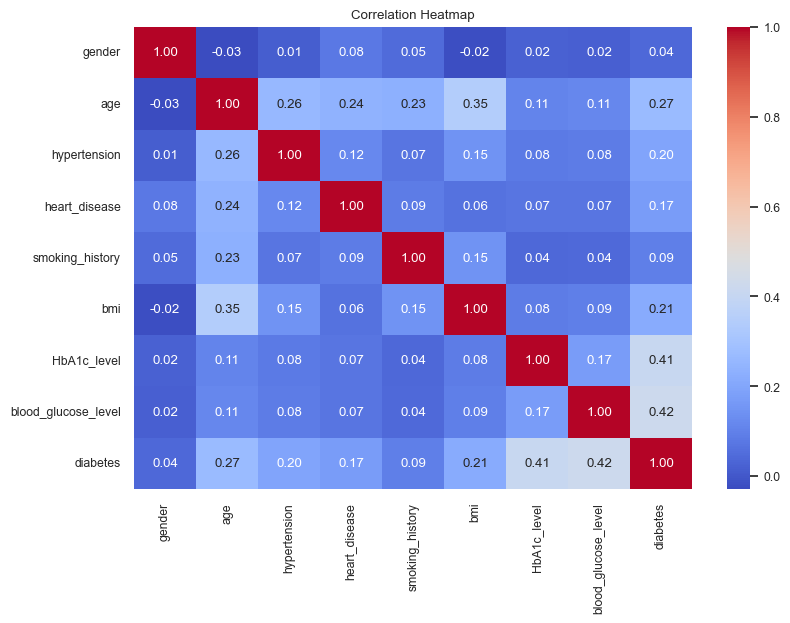

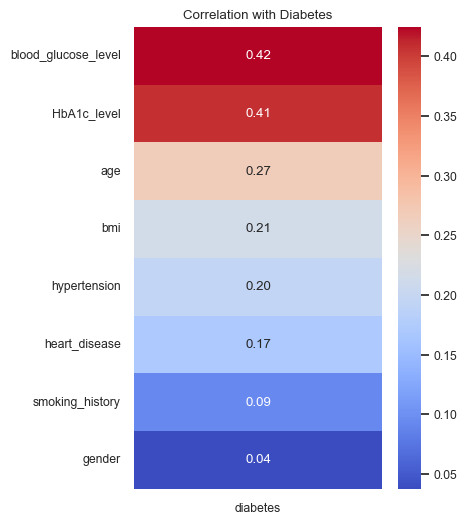

1. The variables blood_glucose_level and HbA1c_level show the strongest positive correlation with diabetes, suggesting they are good indicators for predicting the condition.
2. There is also a notable positive correlation between age and hypertension as well as age and heart_disease, indicating that as age increases, the likelihood of having hypertension or heart disease also increases.
3. The correlations between gender, smoking_history, and diabetes are relatively weak, suggesting these factors alone may not be strong predictors of diabetes in this dataset.
4. The fields blood_glucose_level and HbA1c_level show the strongest correlations and would be considered highly relevant for modeling.


In [59]:
# Prepare the dataset by encoding categorical variables
# Make a copy of the original data to avoid modifying it directly

data_encoded = data.copy()  
data_encoded['gender'] = data_encoded['gender'].map({'Male': 1, 'Female': 0})
data_encoded['smoking_history'] = data_encoded['smoking_history'].map({'current': 1, 'ever': 1, 'former': 1, 'never': 0, 'No Info': 0})

print('The category "Ever" represents individuals who have ever smoked in their lifetime, regardless of their current smoking status. It includes individuals who are currently smoking ("Current"), as well as those who have previously smoked but may have quit at the time of data collection ("Former").')
print('Values of current, ever and former are people who have been or are currently associated with the habit of smoking and are marked 1.')

# Save encoded data to a CSV file
data_encoded.to_csv('encoded_data.csv', index=False)

# We can now construct a Correlation Matrix

plt.figure(figsize=(9, 6))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

corr = data_encoded.corr()
target_corr = corr['diabetes'].drop('diabetes')

target_corr_sorted = target_corr.sort_values(ascending=False)

# Plotting the correlations in a heatmap
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
plt.figure(figsize=(4, 6)) 
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

print('1. The variables blood_glucose_level and HbA1c_level show the strongest positive correlation with diabetes, suggesting they are good indicators for predicting the condition.')
print('2. There is also a notable positive correlation between age and hypertension as well as age and heart_disease, indicating that as age increases, the likelihood of having hypertension or heart disease also increases.')
print('3. The correlations between gender, smoking_history, and diabetes are relatively weak, suggesting these factors alone may not be strong predictors of diabetes in this dataset.')
print('4. The fields blood_glucose_level and HbA1c_level show the strongest correlations and would be considered highly relevant for modeling.')

In [60]:
from sklearn.ensemble import RandomForestClassifier

# 'diabetes' is the target variable
X = data_encoded.drop('diabetes', axis=1)  
y = data_encoded['diabetes']

# Initializing the Random Forest classifier
rf = RandomForestClassifier()

# Fitting the model on the entire dataset 
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Transform the importances into a DataFrame for easier visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(features_df)
print('From Random Forest also we see that blood_glucose_level and HbA1c_level show the strongest correlations.')

               Feature  Importance
6          HbA1c_level    0.396056
7  blood_glucose_level    0.327983
5                  bmi    0.134377
1                  age    0.104433
2         hypertension    0.015221
3        heart_disease    0.010361
4      smoking_history    0.005863
0               gender    0.005707
From Random Forest also we see that blood_glucose_level and HbA1c_level show the strongest correlations.


### Model Implementation and Baseline Evaluation

Logistic Regression is a widely used algorithm for binary classification tasks like predicting diabetes (yes or no). The model also provides probabilities, which can be helpful for medical diagnoses where understanding risk levels is important.


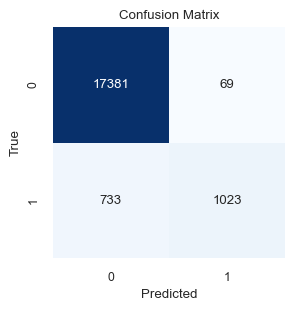

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17450
           1       0.94      0.58      0.72      1756

    accuracy                           0.96     19206
   macro avg       0.95      0.79      0.85     19206
weighted avg       0.96      0.96      0.95     19206

The model predicted the non-diabetic class (0) with high accuracy. There were 18,189 true negatives (correctly predicted non-diabetic) and 733 false negatives (diabetic cases incorrectly predicted as non-diabetic). For the diabetic class (1), the model correctly predicted 975 cases but there were 103 false positives (non-diabetic cases incorrectly predicted as diabetic).
Feature Importance:
                     Coefficient
blood_glucose_level     1.397026
HbA1c_level             2.525428
bmi                     0.640144


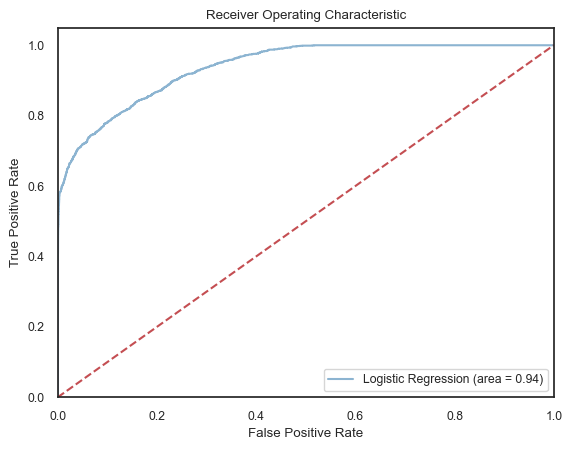

1. The Receiver Operating Characteristic (ROC) curve shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) at various threshold settings.
2. The Area Under the Curve (AUC) for the ROC is 0.94, which is a high value and indicates that the model has a high degree of discriminative power between the diabetic and non-diabetic classes.
3. The Logistic Regression model performed well in distinguishing between diabetic and non-diabetic cases with high overall accuracy. It was particularly effective at identifying non-diabetic cases.
4. The model could be improved in terms of recall for the diabetic class, potentially by exploring different threshold settings or resampling techniques to address any class imbalance.


In [61]:
print('Logistic Regression is a widely used algorithm for binary classification tasks like predicting diabetes (yes or no). The model also provides probabilities, which can be helpful for medical diagnoses where understanding risk levels is important.')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Using the important features identified by the correlation matrix
X = data_encoded[['blood_glucose_level', 'HbA1c_level', 'bmi']]
y = data_encoded['diabetes']

# Dividing dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling and standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

print('The model predicted the non-diabetic class (0) with high accuracy. There were 18,189 true negatives (correctly predicted non-diabetic) and 733 false negatives (diabetic cases incorrectly predicted as non-diabetic). For the diabetic class (1), the model correctly predicted 975 cases but there were 103 false positives (non-diabetic cases incorrectly predicted as diabetic).')

# ROC Curve and AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Feature Importance
feature_importance = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coefficient'])
print("Feature Importance:")
print(feature_importance)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('1. The Receiver Operating Characteristic (ROC) curve shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) at various threshold settings.')
print('2. The Area Under the Curve (AUC) for the ROC is 0.94, which is a high value and indicates that the model has a high degree of discriminative power between the diabetic and non-diabetic classes.')
print('3. The Logistic Regression model performed well in distinguishing between diabetic and non-diabetic cases with high overall accuracy. It was particularly effective at identifying non-diabetic cases.')
print('4. The model could be improved in terms of recall for the diabetic class, potentially by exploring different threshold settings or resampling techniques to address any class imbalance.')

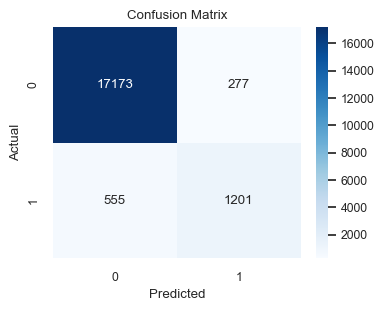

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17450
           1       0.81      0.68      0.74      1756

    accuracy                           0.96     19206
   macro avg       0.89      0.83      0.86     19206
weighted avg       0.95      0.96      0.95     19206



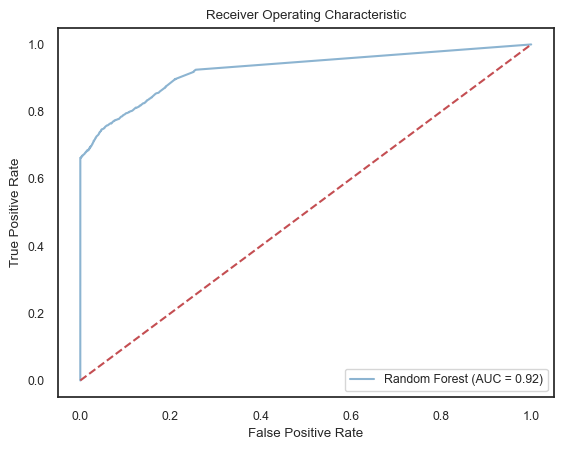

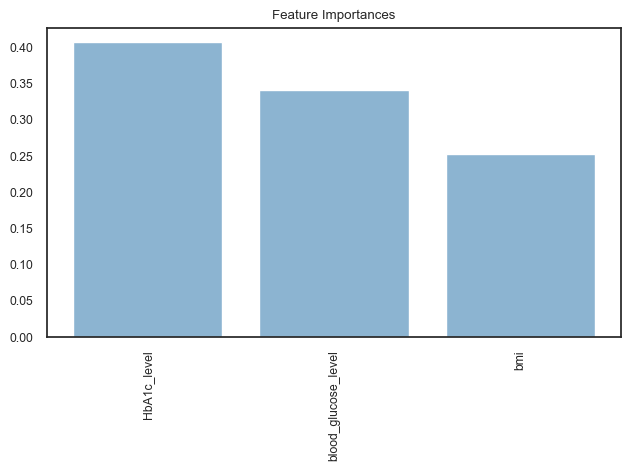

In [62]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the relevant features for the Random Forest model
X = data_encoded[['blood_glucose_level', 'HbA1c_level', 'bmi']]
y = data_encoded['diabetes'].astype(int)  # Ensure the target is an integer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features (Random Forest does not require feature scaling, but it can be beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_scaled, y_train)

# Predict the labels of the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate the ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Feature importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


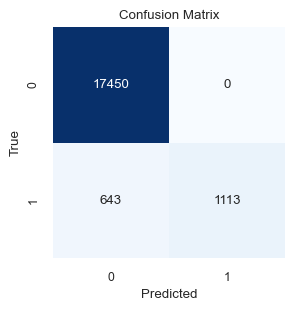

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17450
           1       1.00      0.63      0.78      1756

    accuracy                           0.97     19206
   macro avg       0.98      0.82      0.88     19206
weighted avg       0.97      0.97      0.96     19206



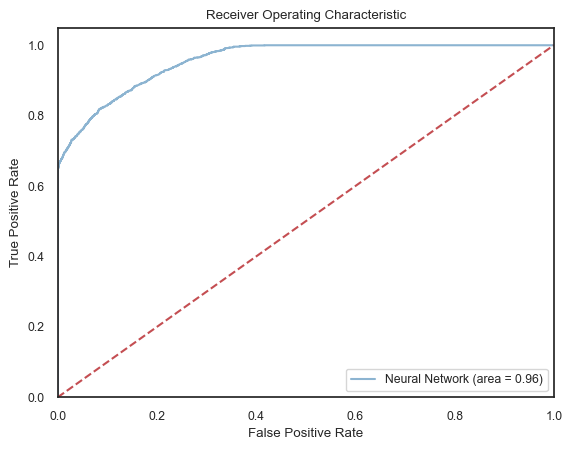

In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the features and the target
X = data_encoded[['blood_glucose_level', 'HbA1c_level', 'bmi']]
y = data_encoded['diabetes']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multi-Layer Perceptron Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)

# Fit the model to the training data
mlp_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = mlp_clf.predict(X_test)
y_pred_proba = mlp_clf.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Neural Network (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Splitting the data into features and target variable, removing 'gender'
X = data_encoded[['blood_glucose_level', 'HbA1c_level', 'bmi']]
y = data_encoded['diabetes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC()
gradient_boosting = GradientBoostingClassifier()
neural_network = MLPClassifier()

classifiers = {
    "Logistic Regression": logistic_regression,
    "Random Forest": random_forest,
    "Support Vector Machine": svm,
    "Gradient Boosting": gradient_boosting,
    "Neural Network": neural_network
}

# Training and evaluating classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print("\n")


In [28]:
import numpy as np
import pandas as pd
# Assuming 'data_encoded' is your DataFrame and has already been defined

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Preparing the data
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes'].astype(int)  # Ensure target variable is integer

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameters grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the accuracy of the model with those parameters
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model found by GridSearchCV on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17450
           1       1.00      0.66      0.80      1756

    accuracy                           0.97     19206
   macro avg       0.98      0.83      0.89     19206
weighted avg       0.97      0.97      0.97     19206



In [30]:
# Encode the categorical data
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['smoking_history'] = data['smoking_history'].map({'current': 1, 'ever': 1, 'former': 1, 'never': 0, 'No Info': 0})

# Define the features and the target
X = data[['blood_glucose_level', 'HbA1c_level', 'bmi', 'age', 'gender', 'smoking_history']]
y = data['diabetes'].astype(int)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameters grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the accuracy of the model with those parameters
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model found by GridSearchCV on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))



KeyboardInterrupt

